# TP sur modèles deformables

DE MENEZES LIMA Marina

In [1]:
#%% SECTION 1 inclusion de packages externes 
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import img_as_float
from skimage.segmentation import chan_vese
from skimage.segmentation import checkerboard_level_set
from skimage.segmentation import circle_level_set

In [2]:
if 'google.colab' in str(get_ipython()):
  from google_drive_downloader import GoogleDriveDownloader as gdd

  gdd.download_file_from_google_drive(file_id='1qxe_wfGjOj02BtjByIf3YtFuU8qIAI23',
                                      dest_path='./TP6',
                                      unzip=True)  
else:
  print('You are not using Colab. Please define working_dir with the absolute path to the folder where you downloaded the data')

Unzipping...Done.


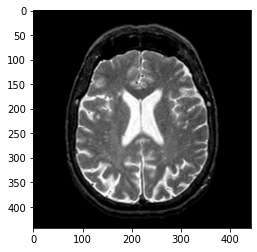

In [3]:
#%% SECTION 2 - Lecture de l'image

im=skio.imread('brain.bmp')
im=im[:,:,1]

plt.imshow(im, cmap="gray")

# Méthode des contours actifs paramétriques

Pour analyser l’influence de chaque paramètre, on part de les valeurs initiales et on les change un paramètre à la fois. Dans l'image, le contour rouge
est le contour initiale (paramètre init) et le contour bleu est le contour retourné par l’algorithme (le serpent):

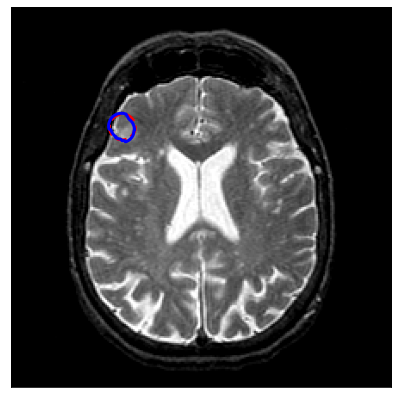

In [4]:
#%% SECTION 3a - Segmentation by contours actifs
im=skio.imread('brain.bmp')
im=im[:,:,1]

s = np.linspace(0, 2*np.pi, 100)
r = 140 + 15*np.sin(s)
c = 130 + 15*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(im, 0.1),
                       init, alpha=0.5, beta=5, w_edge=20, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])

plt.show()

* Paramètre d'initialisation:

D’abord, on observe si on change la position initiale du contour ou du rayon, le serpent change complètement aussi.

La bonne initialisation est le paramètre le plus important pour que l’algorithme marche bien, une fois qu'on ne pourrait pas contourner la partie souhaitée si on initialise le contour dans un partie complètement différente dans l'image. La taille du rayon est très importante aussi, une fois qu'on a le même problème que si on met de rayon trop petit ou trop grand.

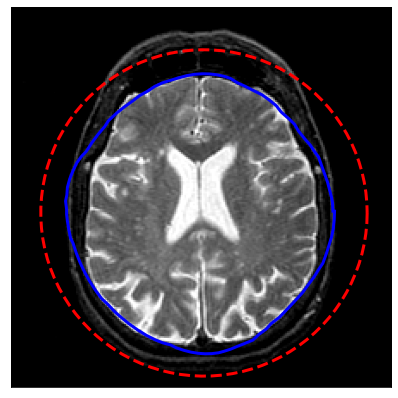

In [5]:
s = np.linspace(0, 2*np.pi, 100)
r = 240 + 190*np.sin(s)
c = 225 + 190*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(im, 0.1),
                       init, alpha=0.5, beta=5, w_edge=20, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])

plt.show()

* Alpha: 

Le paramètre alpha a influence sur la taille de contraction du
contour du serpent. Si on met alpha grand, le serpent sera plus contracté et pour un petit alpha il sera moins contracté.

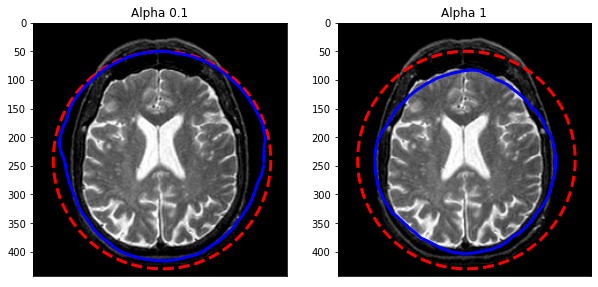

In [6]:
s = np.linspace(0, 2*np.pi, 100)
r = 240 + 190*np.sin(s)
c = 225 + 190*np.cos(s)
init = np.array([r, c]).T

snake1 = active_contour(gaussian(im, 0.1),
                       init, alpha=0.1, beta=5, w_edge=20, gamma=0.001)

snake2 = active_contour(gaussian(im, 0.1),
                       init, alpha=1, beta=5, w_edge=20, gamma=0.001)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(im, cmap=plt.cm.gray)
ax1.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax1.plot(snake1[:, 1], snake1[:, 0], '-b', lw=3)
ax1.set_xticks([]), ax.set_yticks([])
ax1.axis([0, im.shape[1], im.shape[0], 0])
ax1.set_title("Alpha 0.1")

ax2.imshow(im, cmap=plt.cm.gray)
ax2.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax2.plot(snake2[:, 1], snake2[:, 0], '-b', lw=3)
ax2.set_xticks([]), ax.set_yticks([])
ax2.axis([0, im.shape[1], im.shape[0], 0])
ax2.set_title("Alpha 1")

plt.show()

* Beta: 

Le paramètre beta contrôle le lissage du serpent. Plus grand est beta, plus lisse est le serpent.


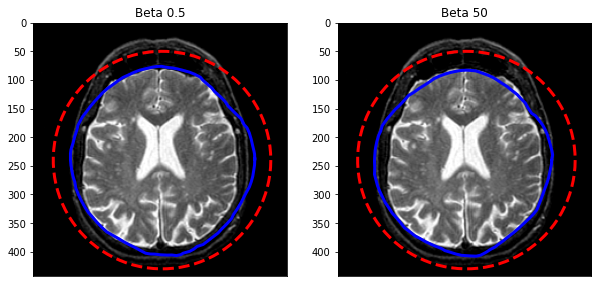

In [7]:
s = np.linspace(0, 2*np.pi, 100)
r = 240 + 190*np.sin(s)
c = 225 + 190*np.cos(s)
init = np.array([r, c]).T

snake1 = active_contour(gaussian(im, 0.1),
                       init, alpha=0.5, beta=0.1, w_edge=20, gamma=0.001)

snake2 = active_contour(gaussian(im, 0.1),
                       init, alpha=0.5, beta=20, w_edge=20, gamma=0.001)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(im, cmap=plt.cm.gray)
ax1.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax1.plot(snake1[:, 1], snake1[:, 0], '-b', lw=3)
ax1.set_xticks([]), ax.set_yticks([])
ax1.axis([0, im.shape[1], im.shape[0], 0])
ax1.set_title("Beta 0.5")

ax2.imshow(im, cmap=plt.cm.gray)
ax2.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax2.plot(snake2[:, 1], snake2[:, 0], '-b', lw=3)
ax2.set_xticks([]), ax.set_yticks([])
ax2.axis([0, im.shape[1], im.shape[0], 0])
ax2.set_title("Beta 50")

plt.show()

* W_edge: 

Le paramètre w_edge contrôle "l’attraction" aux arrêtes, c'est-à-dire, si on l’augmente le serpent sera plus proche des
arêtes et si on le diminue, il sera plus loin des arrêtes.

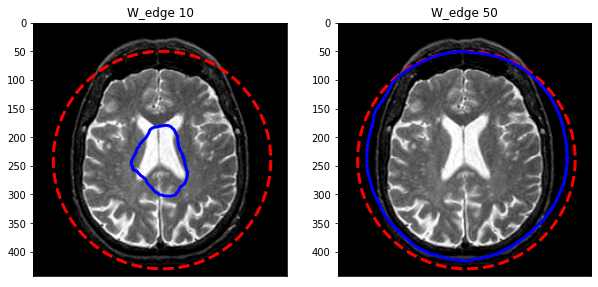

In [8]:
s = np.linspace(0, 2*np.pi, 100)
r = 240 + 190*np.sin(s)
c = 225 + 190*np.cos(s)
init = np.array([r, c]).T

snake1 = active_contour(gaussian(im, 0.1),
                       init, alpha=0.5, beta=5, w_edge=10, gamma=0.001)

snake2 = active_contour(gaussian(im, 0.1),
                       init, alpha=0.5, beta=5, w_edge=50, gamma=0.001)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(im, cmap=plt.cm.gray)
ax1.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax1.plot(snake1[:, 1], snake1[:, 0], '-b', lw=3)
ax1.set_xticks([]), ax.set_yticks([])
ax1.axis([0, im.shape[1], im.shape[0], 0])
ax1.set_title("W_edge 10")

ax2.imshow(im, cmap=plt.cm.gray)
ax2.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax2.plot(snake2[:, 1], snake2[:, 0], '-b', lw=3)
ax2.set_xticks([]), ax.set_yticks([])
ax2.axis([0, im.shape[1], im.shape[0], 0])
ax2.set_title("W_edge 50")

plt.show()

* Gamma: 

Gamma est le paramètre de pas de temps explicite, le terme d’inertie pour régulariser la matrice A. Plus il est petit, plus proche il est d'un cercle plus parfait.

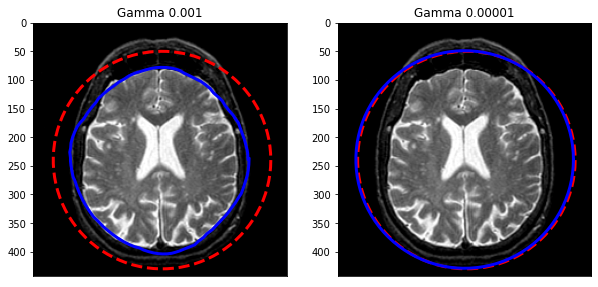

In [9]:
s = np.linspace(0, 2*np.pi, 100)
r = 240 + 190*np.sin(s)
c = 225 + 190*np.cos(s)
init = np.array([r, c]).T

snake1 = active_contour(gaussian(im, 0.1),
                       init, alpha=0.5, beta=5, w_edge=20, gamma=0.001)

snake2 = active_contour(gaussian(im, 0.1),
                       init, alpha=0.5, beta=5, w_edge=20, gamma=0.00001)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(im, cmap=plt.cm.gray)
ax1.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax1.plot(snake1[:, 1], snake1[:, 0], '-b', lw=3)
ax1.set_xticks([]), ax.set_yticks([])
ax1.axis([0, im.shape[1], im.shape[0], 0])
ax1.set_title("Gamma 0.001")

ax2.imshow(im, cmap=plt.cm.gray)
ax2.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax2.plot(snake2[:, 1], snake2[:, 0], '-b', lw=3)
ax2.set_xticks([]), ax.set_yticks([])
ax2.axis([0, im.shape[1], im.shape[0], 0])
ax2.set_title("Gamma 0.00001")

plt.show()

# Méthode des contours ouverts

Dans ce cas, on a les mêmes paramètres que ceux présentés ci-dessus:

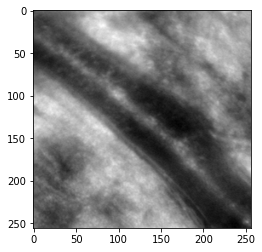

In [58]:
im = skio.imread('retineOA.bmp')

plt.imshow(im, cmap="gray")

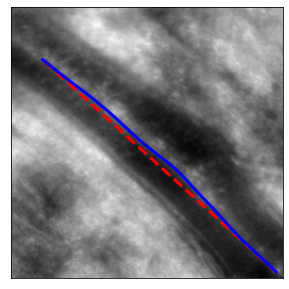

In [115]:
#%% SECTION 3b - Contours ouverts

r = np.linspace(250, 50, 100)
c = np.linspace(250, 30, 100)
init = np.array([r, c]).T

snake = active_contour(gaussian(im, 1), init, boundary_condition='fixed',
                       alpha=0.5, beta=5, w_line=0, w_edge=10, gamma=0.01)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])

plt.show()

* Alpha

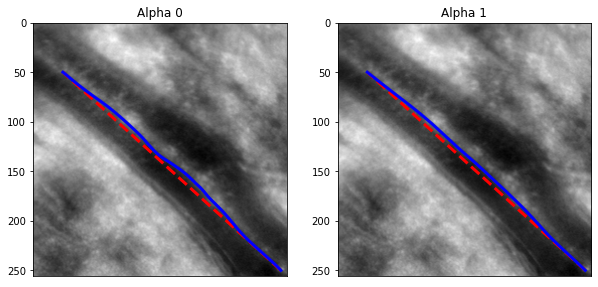

In [123]:
r = np.linspace(250, 50, 100)
c = np.linspace(250, 30, 100)
init = np.array([r, c]).T

snake1 = active_contour(gaussian(im, 1), init, boundary_condition='fixed',
                       alpha=0, beta=5, w_line=0, w_edge=10, gamma=0.01)

snake2 = active_contour(gaussian(im, 1), init, boundary_condition='fixed',
                       alpha=1, beta=5, w_line=0, w_edge=10, gamma=0.01)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(im, cmap=plt.cm.gray)
ax1.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax1.plot(snake1[:, 1], snake1[:, 0], '-b', lw=3)
ax1.set_xticks([]), ax.set_yticks([])
ax1.axis([0, im.shape[1], im.shape[0], 0])
ax1.set_title("Alpha 0")

ax2.imshow(im, cmap=plt.cm.gray)
ax2.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax2.plot(snake2[:, 1], snake2[:, 0], '-b', lw=3)
ax2.set_xticks([]), ax.set_yticks([])
ax2.axis([0, im.shape[1], im.shape[0], 0])
ax2.set_title("Alpha 1")

plt.show()

* Beta

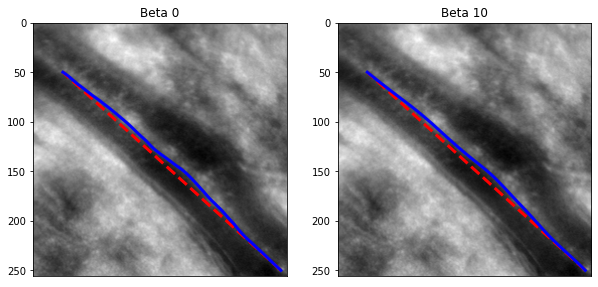

In [125]:
r = np.linspace(250, 50, 100)
c = np.linspace(250, 30, 100)
init = np.array([r, c]).T

snake1 = active_contour(gaussian(im, 1), init, boundary_condition='fixed',
                       alpha=0.5, beta=0, w_line=0, w_edge=10, gamma=0.01)

snake2 = active_contour(gaussian(im, 1), init, boundary_condition='fixed',
                       alpha=0.5, beta=10, w_line=0, w_edge=10, gamma=0.01)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(im, cmap=plt.cm.gray)
ax1.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax1.plot(snake1[:, 1], snake1[:, 0], '-b', lw=3)
ax1.set_xticks([]), ax.set_yticks([])
ax1.axis([0, im.shape[1], im.shape[0], 0])
ax1.set_title("Beta 0")

ax2.imshow(im, cmap=plt.cm.gray)
ax2.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax2.plot(snake2[:, 1], snake2[:, 0], '-b', lw=3)
ax2.set_xticks([]), ax.set_yticks([])
ax2.axis([0, im.shape[1], im.shape[0], 0])
ax2.set_title("Beta 10")

plt.show()

* W_edge

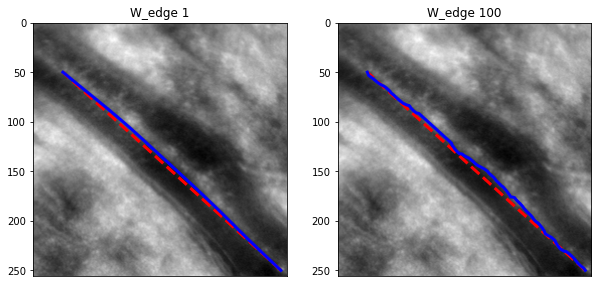

In [118]:
r = np.linspace(250, 50, 100)
c = np.linspace(250, 30, 100)
init = np.array([r, c]).T

snake1 = active_contour(gaussian(im, 1), init, boundary_condition='fixed',
                       alpha=0.5, beta=5, w_line=0, w_edge=1, gamma=0.01)

snake2 = active_contour(gaussian(im, 1), init, boundary_condition='fixed',
                       alpha=0.5, beta=5, w_line=0, w_edge=100, gamma=0.01)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(im, cmap=plt.cm.gray)
ax1.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax1.plot(snake1[:, 1], snake1[:, 0], '-b', lw=3)
ax1.set_xticks([]), ax.set_yticks([])
ax1.axis([0, im.shape[1], im.shape[0], 0])
ax1.set_title("W_edge 1")

ax2.imshow(im, cmap=plt.cm.gray)
ax2.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax2.plot(snake2[:, 1], snake2[:, 0], '-b', lw=3)
ax2.set_xticks([]), ax.set_yticks([])
ax2.axis([0, im.shape[1], im.shape[0], 0])
ax2.set_title("W_edge 100")

plt.show()

* Gamma

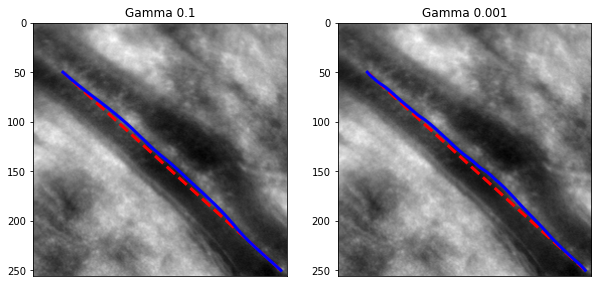

In [119]:
r = np.linspace(250, 50, 100)
c = np.linspace(250, 30, 100)
init = np.array([r, c]).T

snake1 = active_contour(gaussian(im, 1), init, boundary_condition='fixed',
                       alpha=0.5, beta=5, w_line=0, w_edge=10, gamma=0.1)

snake2 = active_contour(gaussian(im, 1), init, boundary_condition='fixed',
                       alpha=0.5, beta=5, w_line=0, w_edge=10, gamma=0.001)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(im, cmap=plt.cm.gray)
ax1.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax1.plot(snake1[:, 1], snake1[:, 0], '-b', lw=3)
ax1.set_xticks([]), ax.set_yticks([])
ax1.axis([0, im.shape[1], im.shape[0], 0])
ax1.set_title("Gamma 0.1")

ax2.imshow(im, cmap=plt.cm.gray)
ax2.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax2.plot(snake2[:, 1], snake2[:, 0], '-b', lw=3)
ax2.set_xticks([]), ax.set_yticks([])
ax2.axis([0, im.shape[1], im.shape[0], 0])
ax2.set_title("Gamma 0.001")

plt.show()

#  Méthode de Chan et Vese

On répéte le même processus que précédemment, en changeant la valeur de chaque variable pour analyser son effet sur l'image:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: circle_level_set is deprecated in favor of disk_level_set.circle_level_set will be removed in version 0.19


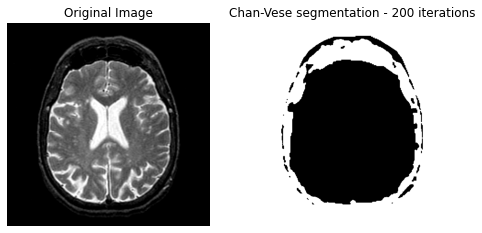

In [13]:
im=skio.imread('brain.bmp')
im=im[:,:,1]
image = img_as_float(im)

# Init avec un damier
# init_ls = checkerboard_level_set(image.shape, 6)

# Init avec un cercle
# init_ls = circle_level_set(image.shape, (120,130), 10)

# Init avec plusieurs cercles
circleNum = 8
circleRadius = image.shape[0] / (3*circleNum)
circleStep0 = image.shape[0]/(circleNum+1)
circleStep1 = image.shape[1]/(circleNum+1)
init_ls = np.zeros(image.shape)
for i in range(circleNum):
        for j in range(circleNum):
            init_ls = init_ls + circle_level_set (image.shape, 
                                                  ((i+1)*circleStep0, (j+1)*circleStep1), circleRadius)

cv = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

plt.show()

* Paramètre d'initialisation: 

On commence pour changer les paramètres d'initalisation. Si on prend une grille de cercles au lieu d’un seul, la segmentation est beaucoup plus grande.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: circle_level_set is deprecated in favor of disk_level_set.circle_level_set will be removed in version 0.19
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: circle_level_set is deprecated in favor of disk_level_set.circle_level_set will be removed in version 0.19
  app.launch_new_instance()


Text(0.5, 1.0, 'Various circles')

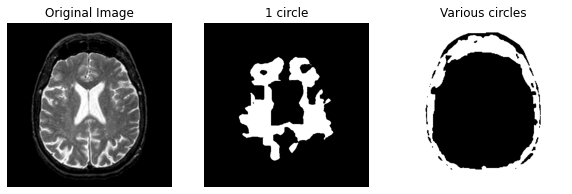

In [22]:
# Init avec un cercle
init_ls = circle_level_set(image.shape, (120,130), 10)

cv_one = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

# Init avec plusieurs cercles
circleNum = 8
circleRadius = image.shape[0] / (3*circleNum)
circleStep0 = image.shape[0]/(circleNum+1)
circleStep1 = image.shape[1]/(circleNum+1)
init_ls = np.zeros(image.shape)
for i in range(circleNum):
        for j in range(circleNum):
            init_ls = init_ls + circle_level_set (image.shape, 
                                                  ((i+1)*circleStep0, (j+1)*circleStep1), circleRadius)

cv_various = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv_one[0], cmap="gray")
ax[1].set_axis_off()
title = "1 circle"
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv_various[0], cmap="gray")
ax[2].set_axis_off()
title = "Various circles"
ax[2].set_title(title, fontsize=12)


* Mu: 

Le paramètre mu est le terme de pénalité de la taille du contour. Si il est petit, le résultat a beaucoup de zones détachées, mais quand on l’augment il défavorise l'existence de plusieurs groupes.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: circle_level_set is deprecated in favor of disk_level_set.circle_level_set will be removed in version 0.19
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Mu = 0.6')

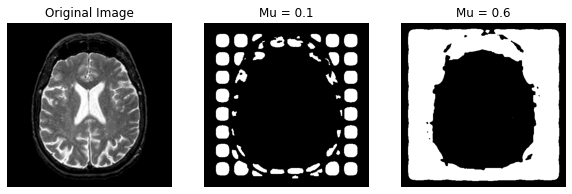

In [21]:
# Init avec plusieurs cercles
circleNum = 8
circleRadius = image.shape[0] / (3*circleNum)
circleStep0 = image.shape[0]/(circleNum+1)
circleStep1 = image.shape[1]/(circleNum+1)
init_ls = np.zeros(image.shape)
for i in range(circleNum):
        for j in range(circleNum):
            init_ls = init_ls + circle_level_set (image.shape, 
                                                  ((i+1)*circleStep0, (j+1)*circleStep1), circleRadius)

cv_mup = chan_vese(image, mu=0.1, lambda1=5, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

cv_mug = chan_vese(image, mu=0.6, lambda1=5, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv_mup[0], cmap="gray")
ax[1].set_axis_off()
title = "Mu = 0.1"
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv_mug[0], cmap="gray")
ax[2].set_axis_off()
title = "Mu = 0.6"
ax[2].set_title(title, fontsize=12)

* Lambda1 et Lambda 2:

Lambda1 est le poid pour la région “vraie” (classe 1) dans le résultat, et Lambda2 est ce de la région "false" (classe 0). Plus Lambda1 est grand par rapport au lambda2, plus la région de la classe 1 région est petite. Le contraire est aussi valide.

Ainsi, si on diminue la proportion Lambda1/Lambda2, on augmente Région1/Région0.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: circle_level_set is deprecated in favor of disk_level_set.circle_level_set will be removed in version 0.19
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Lambda1=5, Lambda2=1')

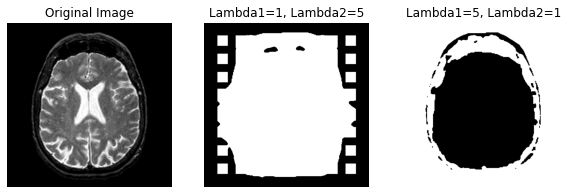

In [20]:
# Init avec plusieurs cercles
circleNum = 8
circleRadius = image.shape[0] / (3*circleNum)
circleStep0 = image.shape[0]/(circleNum+1)
circleStep1 = image.shape[1]/(circleNum+1)
init_ls = np.zeros(image.shape)
for i in range(circleNum):
        for j in range(circleNum):
            init_ls = init_ls + circle_level_set (image.shape, 
                                                  ((i+1)*circleStep0, (j+1)*circleStep1), circleRadius)

cv_1p = chan_vese(image, mu=0.25, lambda1=1, lambda2=5, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

cv_1g = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)


fig, axes = plt.subplots(1, 3, figsize=(10, 10))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv_1p[0], cmap="gray")
ax[1].set_axis_off()
title = "Lambda1=1, Lambda2=5"
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv_1g[0], cmap="gray")
ax[2].set_axis_off()
title = "Lambda1=5, Lambda2=1"
ax[2].set_title(title, fontsize=12)


* tol: tolérance entre itérations du level_set pour déterminer si l’algorithme a convergé.
* max_iter: maximum nombre d’itérations permis avant que l’algorithme soit fini.

Ces paramètres sont donc deux conditions d'arrêt.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: circle_level_set is deprecated in favor of disk_level_set.circle_level_set will be removed in version 0.19
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Max_iter = 200')

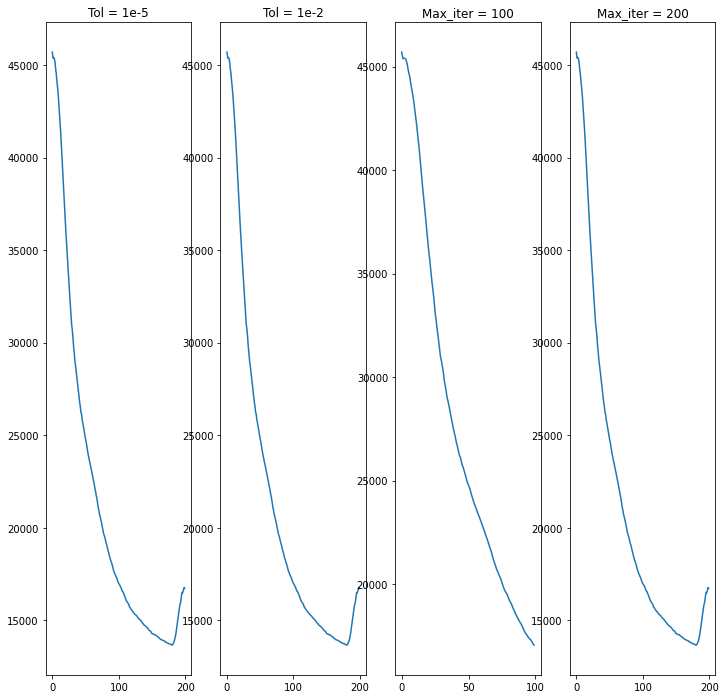

In [30]:
# Init avec plusieurs cercles
circleNum = 8
circleRadius = image.shape[0] / (3*circleNum)
circleStep0 = image.shape[0]/(circleNum+1)
circleStep1 = image.shape[1]/(circleNum+1)
init_ls = np.zeros(image.shape)
for i in range(circleNum):
        for j in range(circleNum):
            init_ls = init_ls + circle_level_set (image.shape, 
                                                  ((i+1)*circleStep0, (j+1)*circleStep1), circleRadius)

cv_tolp = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-5, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

cv_tolg = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-2, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

cv_maxp = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_iter=100,
               dt=0.5, init_level_set=init_ls, extended_output=True)

cv_maxg = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

fig, axes = plt.subplots(1, 4, figsize=(12, 12))
ax = axes.flatten()

ax[0].plot(cv_tolp[2])
title = "Tol = 1e-5"
ax[0].set_title(title, fontsize=12)

ax[1].plot(cv_tolg[2])
title = "Tol = 1e-2"
ax[1].set_title(title)

ax[2].plot(cv_maxp[2])
title = "Max_iter = 100"
ax[2].set_title(title, fontsize=12)

ax[3].plot(cv_maxg[2])
title = "Max_iter = 200"
ax[3].set_title(title, fontsize=12)

# Segmentation de l’IRM 1 du cerveau

Dans cette partie, on essaye de segmenter le corps blanc au centre de l'image 'brain.bmp'.

Pour la méthode des contours actifs paramétriques, on sait qu'elle peut avoir des problèmes si le format de la partie qu'on veut segmenter a une forte concavité. Dans ce cas, le corps blanc présente des concavités horizontales et verticales et, donc, on rejette cette méthode.

Ensuite, on analyse la méthode de Chan et Vese. Après une série d'essais, on a que le meilleur résultat (visuellement) est obtenu avec une initialisation d'un seule cercle, car l'objet d'intérêt est au centre de l'image, un mu élevé (0.8), car le niveaux de gris sont similaires et on ne veut pas de petites zones, et un lambda 1 élevé (90).

(443, 443)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: circle_level_set is deprecated in favor of disk_level_set.circle_level_set will be removed in version 0.19
  # Remove the CWD from sys.path while we load stuff.


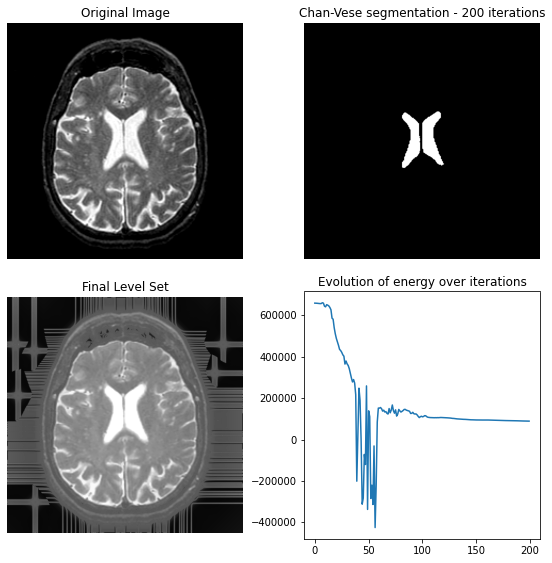

In [56]:
#%% SECTION 4 - Segmentation par ensembles de niveaux

im=skio.imread('brain.bmp')
im=im[:,:,1]
image = img_as_float(im)

print(im.shape)

# Init avec un cercle
init_ls = circle_level_set(image.shape, (220,220), 40)

cv = chan_vese(image, mu=0.8, lambda1=90, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].plot(init_ls[:, 1], init_ls[:, 0], '--r', lw=3)
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)


fig.tight_layout()
plt.show()